# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step1. 下載資料

In [4]:
breastCancer=datasets.load_breast_cancer()

In [41]:
#preview
import pandas as pd

breastCanc = datasets.load_breast_cancer()
dfbreast = pd.DataFrame(breastCanc.data, columns = breastCanc.feature_names)
dfbreast['target'] = pd.Series(breastCanc.target)
dfbreast.head()

#As a general function to convert sklearn_dataset to pandas DataFrame
#def sklearn_to_df(sklearn_dataset):
#    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
#    df['target'] = pd.Series(sklearn_dataset.target)
#    return df

#df_boston = sklearn_to_df(datasets.load_boston())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [68]:
#preview only with feature_names: 'worst smoothness', 'worst concave points'
dfbreast_data = dfbreast[['worst smoothness', 'worst concave points', 'target']]
dfbreast_data.head(5)

,worst smoothness,worst concave points,target
0,0.1622,0.2654,0
1,0.1238,0.1860,0
2,0.1444,0.2430,0
3,0.2098,0.2575,0
4,0.1374,0.1625,0


In [69]:
#preview target_names 'malignant' (0) 惡性
dfbreast_dataM = dfbreast_data[dfbreast_data['target'].isin([0, 0])]
dfbreast_dataM.head()

,worst smoothness,worst concave points,target
0,0.1622,0.2654,0
1,0.1238,0.1860,0
2,0.1444,0.2430,0
3,0.2098,0.2575,0
4,0.1374,0.1625,0


In [70]:
#preview target_names 'benign' (1) 良性
dfbreast_dataB = dfbreast_data[dfbreast_data['target'].isin([1, 1])]
dfbreast_dataB.head()

,worst smoothness,worst concave points,target
19,0.14400,0.12880,1
20,0.13120,0.07283,1
21,0.13240,0.06227,1
37,0.09701,0.05013,1
46,0.12970,0.02564,1


In [10]:
features = breastCancer.data
target = breastCancer.target
print(breastCancer.keys())
print(breastCancer.feature_names)
print(breastCancer.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [11]:
features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
target_names = breastCancer.target_names
labels = target_names[target]

In [15]:
labels

array(['malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignan

In [16]:
#feature_names and its index

#[ 0'mean radius'        1'mean texture'        2'mean perimeter'        3'mean area'       4'mean smoothness'    
#  5'mean compactness'   6'mean concavity'      7'mean concave points'   8'mean symmetry'   9'mean fractal dimension'
# 10'radius error'      11'texture error'      12'perimeter error'      13'area error'     14'smoothness error'
# 15'compactness error' 16'concavity error'    17'concave points error' 18'symmetry error' 19'fractal dimension error'
# 20'worst radius'      21'worst texture'      22'worst perimeter'      23'worst area'     24'worst smoothness' 
# 25'worst compactness' 26'worst concavity'    27'worst concave points' 28'worst symmetry' 29'worst fractal dimension']

print(len(breastCancer.feature_names))

30


In [74]:
#benign: 27'worst concave points', 25'worst compactness'
benignWCPoints = features[labels == 'benign', 27]
benignWCompactness = features[labels == 'benign', 25]
benign = np.c_[benignWCPoints, benignWCompactness]

In [75]:
#malignant: 27'worst concave points', 25'worst compactness'
malignantWCPoints = features[labels == 'malignant', 27]
malignantWCompactness = features[labels == 'malignant', 25]
malignant = np.c_[malignantWCPoints, malignantWCompactness]

In [48]:
import matplotlib.pyplot as plt

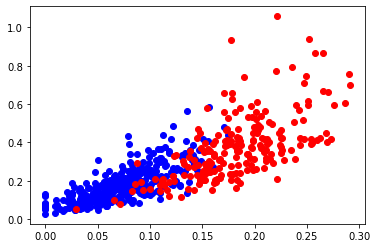

In [87]:
plt.scatter(benign[:,0], benign[:,1], color='blue')
plt.scatter(malignant[:,0], malignant[:,1],color='red')

## Step2. 區分訓練集與測試集

In [84]:
training_data = np.r_[benign, malignant]
training_labels = np.r_[np.zeros(len(malignant)),np.ones(len(benign))]

In [85]:
print(training_data.shape)

(569, 2)


In [102]:
training_data

array([[0.1288 , 0.1773 ],
       [0.07283, 0.2776 ],
       [0.06227, 0.1148 ],
       ...,
       [0.1628 , 0.1922 ],
       [0.1418 , 0.3094 ],
       [0.265  , 0.8681 ]])

In [103]:
training_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [104]:
X = training_data
y = training_labels
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

## Step3. 建模

In [86]:
clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

LinearSVC()

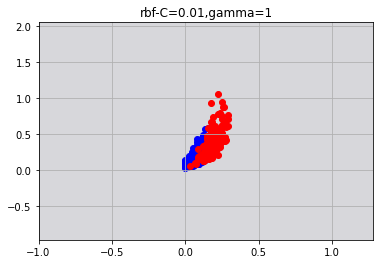

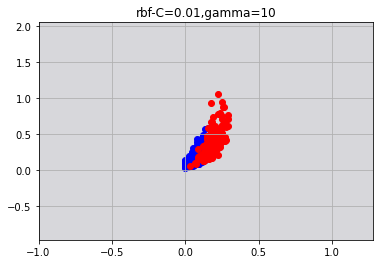

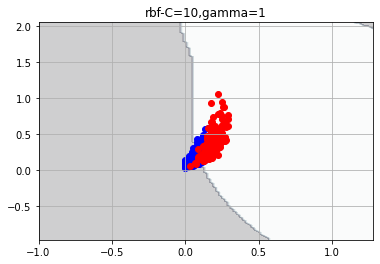

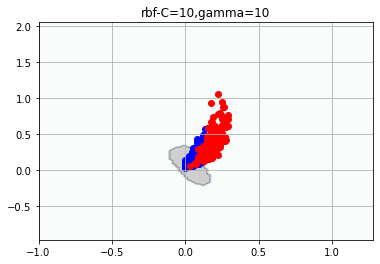

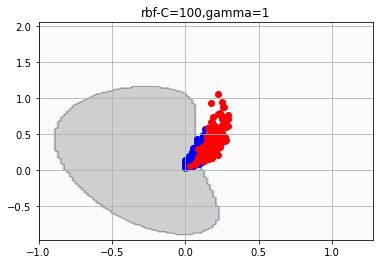

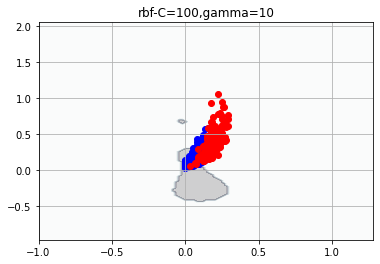

In [106]:
C = [0.01, 10,100]
gamma = [1,10]

for i in range(len(C)):
    for j in range(len(gamma)):
        #print('C={0},gamma={1}'.format(C[i],gamma[j]))
        clf=svm.SVC(kernel='rbf',C = C[i], gamma = gamma[j])
        clf.fit(training_data,training_labels)
        SVM_plot(clf,'rbf-C={0},gamma={1}'.format(C[i],gamma[j]))

In [107]:
clf = svm.SVC(kernel = 'rbf', gamma = 1, C = 100)
clf.fit(X_train, y_train)

SVC(C=100, gamma=1)

## Step4. 預測

```

```


In [108]:
clf.predict(X_test)

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1.])

## Step5. 準確度分析

In [109]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.7437185929648241
0.6900584795321637
